In [1]:
import numpy as np #linear algebra
import pandas as pd # analysis
import matplotlib.pyplot as plt # EDA
import seaborn as sns # EDA
import plotly.express as px #EDA
import warnings # ignore warnings
from sklearn.preprocessing import StandardScaler# normalize data
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Mall_Customers.csv")

read data and clean it

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [5]:
df.drop(["CustomerID"],axis = 1,inplace = True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.duplicated().sum()

In [ ]:
df.describe()

Exploratory data analysis(EDA)

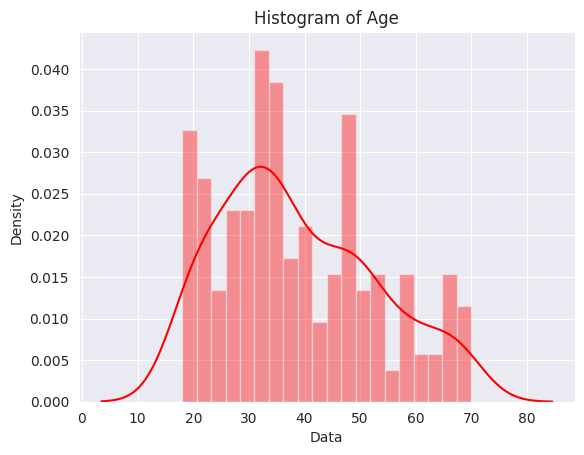

<Figure size 800x600 with 0 Axes>

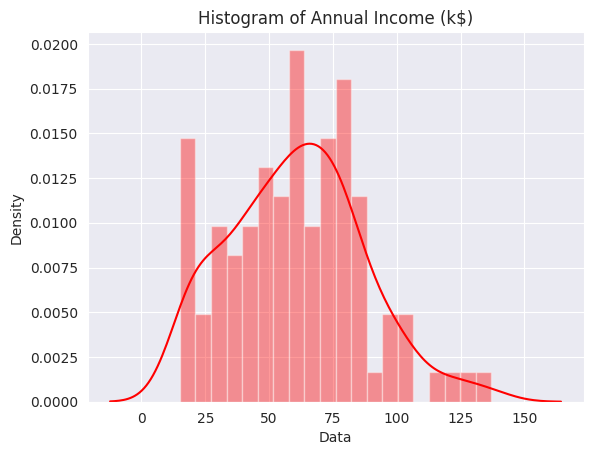

<Figure size 800x600 with 0 Axes>

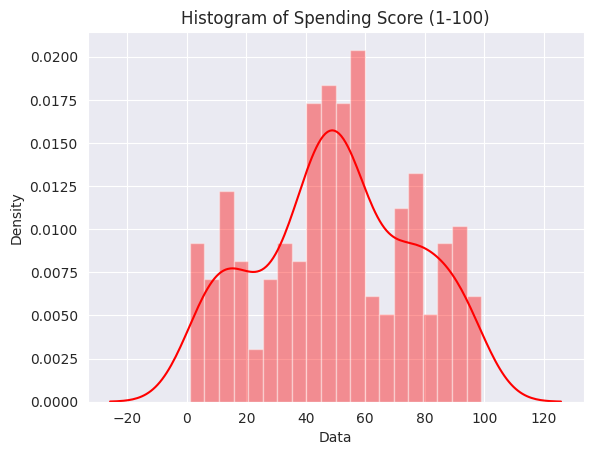

<Figure size 800x600 with 0 Axes>

In [6]:
for col in df[["Age","Annual Income (k$)","Spending Score (1-100)"]]:
    # Choose a style for the plot
    sns.set_style("darkgrid")

    # Control the color palette
    sns.set_palette("husl")

    # Create a distplot
    sns.distplot(df[col], bins=20, color="red")

    # Add labels to the plot
    plt.xlabel("Data")
    plt.ylabel("Density")
    plt.title(f"Histogram of {col}")

    # Control the size of the plot
    plt.figure(figsize=(8, 6))

    # Show the plot
    plt.show()

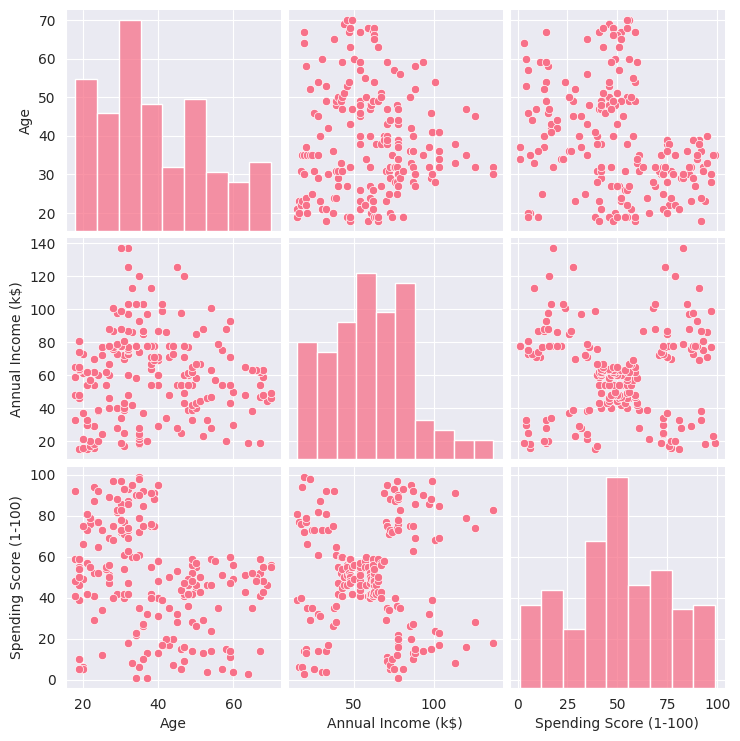

In [11]:
sns.pairplot(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])

<Axes: >

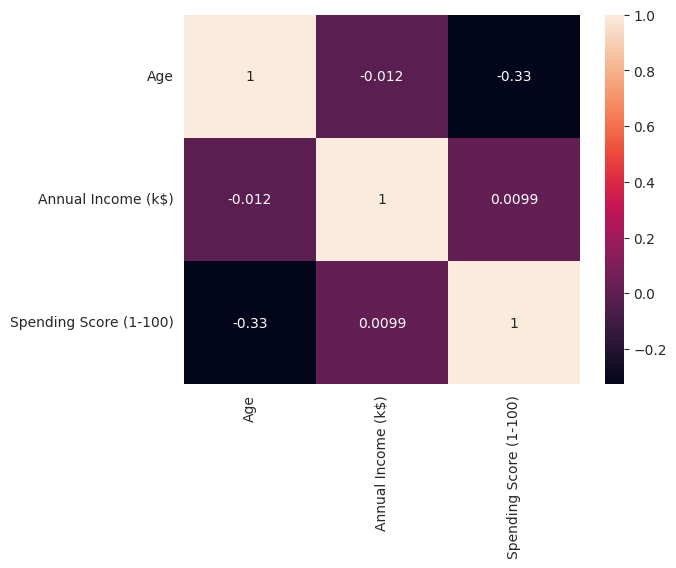

In [13]:
sns.heatmap(df[["Age","Annual Income (k$)","Spending Score (1-100)"]].corr(),annot = True)

Clustering

In [14]:
# normalize data
x = df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
# compute required values
scaler = StandardScaler()
model = scaler.fit(x)
scaled_data = model.transform(x)

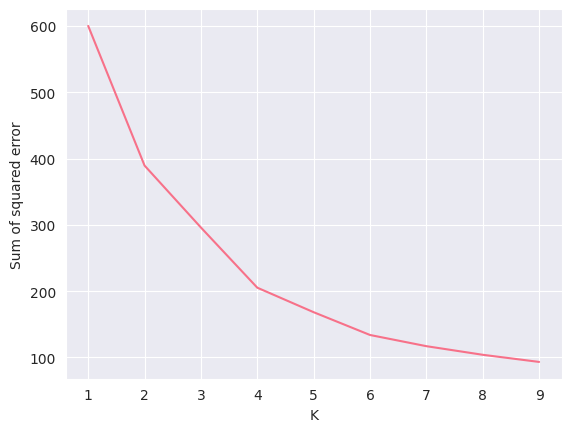

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [16]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(scaled_data)
df['cluster']=y_predicted
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [17]:
clusters = km.labels_
X = x.assign(cluster = clusters)
fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))